## Script written by Samuel Ekwacu to plot climate variables 

In [8]:
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from descartes import PolygonPatch
import matplotlib.path as mplPath
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask

In [9]:
# reads a single netCDF file
ds = xr.open_dataset('D:/Folder_2023/Research/Africa_Research/sst/ERSSTv_grads_ACTIVE-INACTIVE_phe.nc')
#ds
#ds.data_vars

In [7]:
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Oceans_disolved//Oceans_dissolved.shp')

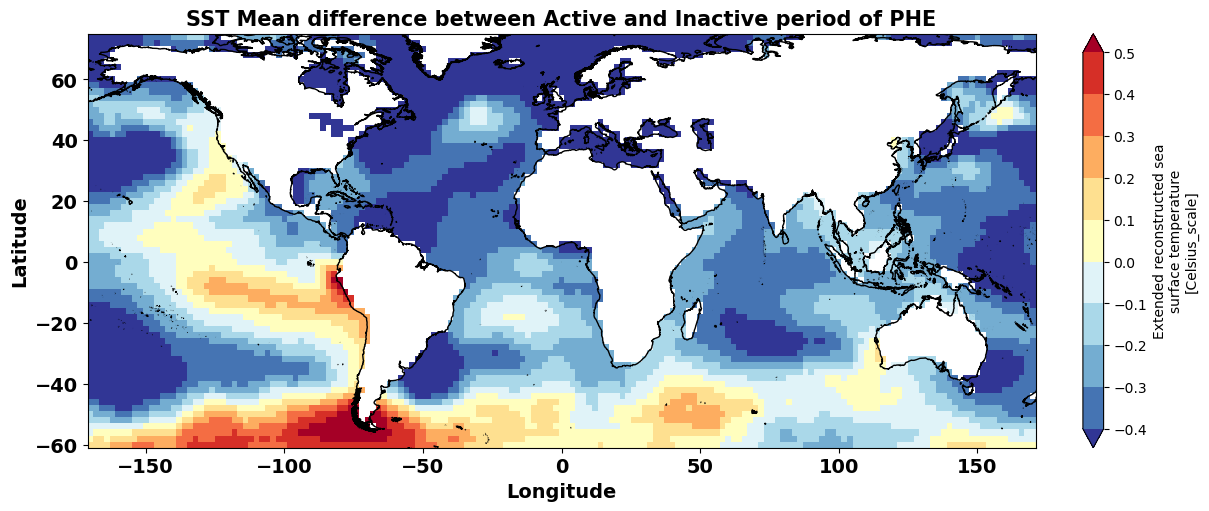

In [8]:
# select one variable and plot
#ds.sst.plot()
#ds.sst.plot(cmap='cmo.thermal')
#ds.sst.plot(cmap=plt.cm.RdYlBu_r)
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 5))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
ds.sst.sel(X=slice(-170,170),Y=slice(-60,75)).plot(cmap=plt.cm.RdYlBu_r, extend='both',levels=np.arange(-0.4, 0.6, 0.1))
plt.title('SST Mean difference between Active and Inactive period of PHE',fontsize=15, fontweight='bold')
plt.xticks(size = 14, fontweight='bold')
plt.yticks(size = 14, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=14, fontweight='bold')
##ploting the legend
#plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
plt.savefig("D:/Folder_2023/Research/Africa_Research/sst/sst_Active-Inactive_diff.png")

## This section plots seasonal mean variables

In [2]:
chirps = xr.open_dataset('D:/Folder_2023/Research/Frank/Frank_OLD/chirps_RFE_monthly_1981-2021-EA.nc')
#chirps

In [3]:
obs_clim = chirps.sel(T=slice("1981-01-16", "2010-12-16"))

In [4]:
#obs_yr=obs_clim.groupby('T.year').mean('T')    ## Group data into yearly means for annual trends

In [7]:
####For seasonal analysis
obs_seas = obs_clim.groupby('T.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('T')
obs_mam = obs_seas['MAM'].mean('T')
obs_jja = obs_seas['JJA'].mean('T')
obs_son = obs_seas['SON'].mean('T')
#obs_djf

In [93]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [13]:
sf = gpd.read_file('D://Folder_2023//Research//EA_Shp//East_Africa-Disolved.shp')  ## Used in Masking
sf2 = shp.Reader('D://Folder_2023//Research//EA_Shp//EA.shp')       ## Used in plotting

In [20]:
## Mask to the shapefile
ds = regionmask.mask_3D_geopandas(sf, obs_djf.X, obs_djf.Y, lon_name='Lon', lat_name='Lat')
ds1 = obs_djf.where(ds)

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_14712\3818014766.py:19: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


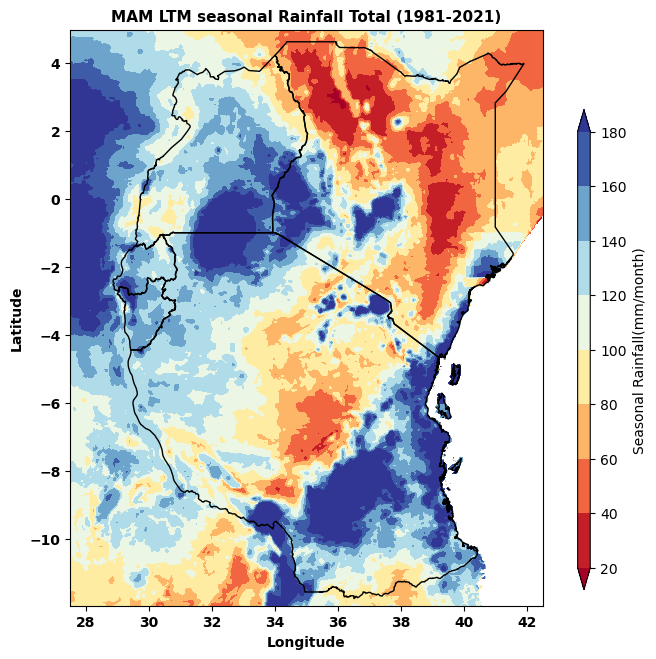

In [47]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
cs = plt.contourf(obs_mam.X, obs_mam.Y, obs_mam.precipitation, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
## title attributes
plt.title('MAM LTM seasonal Rainfall Total (1981-2021)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

# save output
#plt.savefig('D:/Folder_2023/Research/Frank/son_ltm.png')
plt.show()

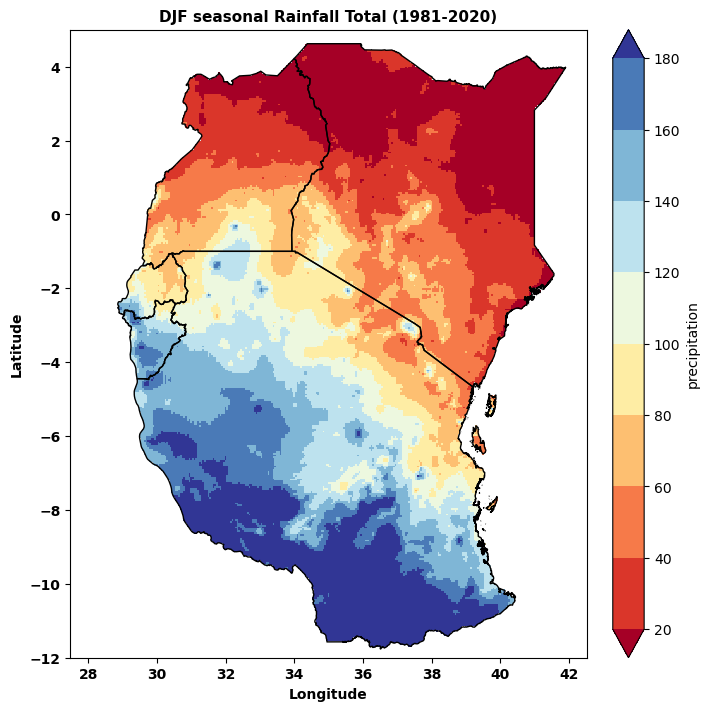

In [91]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 7))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
ds1.precipitation.plot(cmap=plt.cm.RdYlBu,extend='both',levels=np.arange(20, 200, 20))
## title attributes
plt.title('DJF seasonal Rainfall Total (1981-2020)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
#plt.subplots_adjust(bottom=0.1, right=0.7, top=0.8)
###color bar
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
#fig.colorbar(ds1.precipitation, ax=ax, cax=plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')
# save output
#plt.savefig(D:/Folder_2023/Research/Frank/djf_ltm.png')
plt.show()

## Plot_CHIRPS-Udeni 

In [97]:
chirps = xr.open_dataset('D:/Folder_2023/Research/Udeni/CHIRPS_monthly_1981-2021.nc')
#chirps

In [98]:
obs_clim = chirps.sel(time=slice("1981-01-16", "2021-12-16"))

In [99]:
####For seasonal analysis
obs_seas = obs_clim.groupby('time.season')
## The seasons to plot over
obs_djf = obs_seas['DJF'].mean('time')
obs_mam = obs_seas['MAM'].mean('time')
obs_jja = obs_seas['JJA'].mean('time')
obs_son = obs_seas['SON'].mean('time')
#obs_son

In [100]:
obs_yrs = (obs_djf + obs_mam + obs_jja + obs_son)
#obs_yrs

In [94]:
##Read the shapefile
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Sirlanka//LKA_adm//LKA_adm1.shp')

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_12000\3050758736.py:21: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)


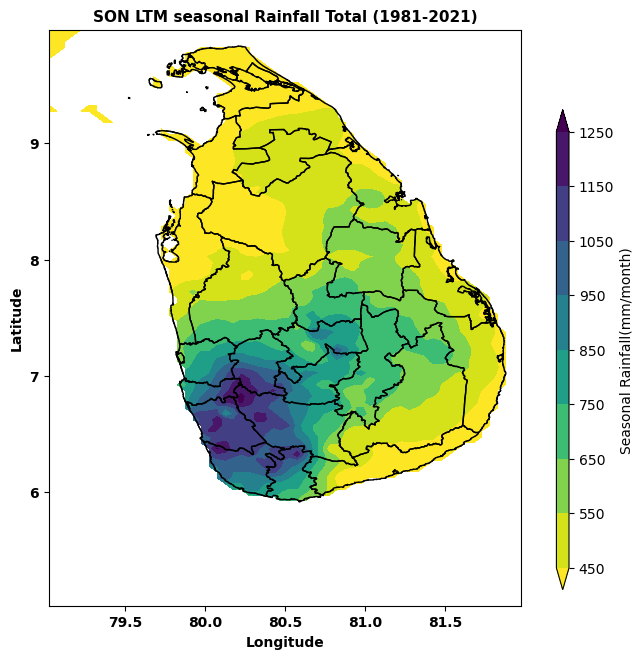

In [103]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(7, 8))

## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))
    
#cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.RdYlBu, levels=np.arange(20, 200, 20), extend='both')
#cs = plt.contourf(obs_son.longitude, obs_son.latitude, obs_son.precip, cmap=plt.cm.RdYlBu, levels=np.arange(100, 400, 50), extend='both')
cs = plt.contourf(obs_yrs.longitude, obs_yrs.latitude, obs_yrs.precip, cmap=plt.cm.viridis_r, levels=np.arange(450, 1300, 100), extend='both')
## title attributes
plt.title('SON LTM seasonal Rainfall Total (1981-2021)',fontsize=11, fontweight='bold')
plt.xticks(size = 10, fontweight='bold')
plt.yticks(size = 10, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=10, fontweight='bold')
plt.xlabel('Longitude',fontsize=10, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.8, top=0.8)
###color bar
fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Seasonal Rainfall(mm/month)')

# save output
#plt.savefig(home_dir + plot_dir + 'Africa_tmean_JRA55-Annual1_1991-2021.png')
plt.show()

## Plotting a trend map 

In [365]:
ds1 = xr.open_dataset('D:/Folder_2023/Research/Africa_Research/sst/sst_trend_Annual_1981_2021_Masked.nc')
ds2 = xr.open_dataset('D:/Folder_2023/Research/Africa_Research/sst/sst_pvalues_Annual_1981_2021Masked.nc')
ds1.data_vars

Data variables:
    crs      int32 ...
    trend    (latitude, longitude) float32 ...

In [244]:
# shape of numpy array
ds1.trend.shape

(89, 181)

In [245]:
from descartes import PolygonPatch
import matplotlib.path as mplPath
## for plotting a polygon
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import shapefile as shp
import regionmask
## Used in plotting
sf2 = shp.Reader('D://Folder_2023//GIS_DATA//Oceans_disolved//Oceans_dissolved.shp')       

C:\Users\Samuel-NUIST\AppData\Local\Temp\ipykernel_10520\3011365296.py:24: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.08, right=0.7, top=0.9)


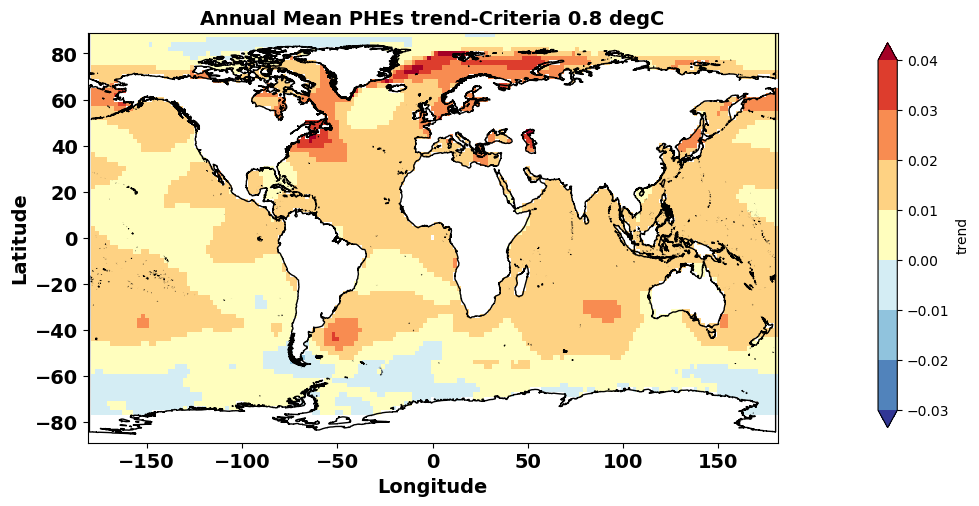

In [247]:
from matplotlib.colors import ListedColormap
none_map = ListedColormap(['none'])
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 5))

## Change this to the threshold you need.
cond = (ds2 <= 0.05)

## Mask out the areas that do not satisfy the conditions
sig_reg = ds1.where(cond)
## Plotting the figure
for poly in sf2.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc='None', ec='black', alpha=1, fill='False', zorder=2))

ds1.trend.plot(levels=np.arange(-0.03, 0.05, 0.01), cmap=plt.cm.RdYlBu_r, extend='both')
#ds.sst.sel(longitude=slice(-170,170),latitude=slice(-60,80)).plot(cmap=plt.cm.RdYlBu_r, extend='both',levels=np.arange(-0.03, 0.05, 0.01))
plt.title('Annual Mean PHEs trend-Criteria 0.8 degC',fontsize=14, fontweight='bold')
plt.xticks(size = 14, fontweight='bold')
plt.yticks(size = 14, fontweight='bold')
##labling the axis
plt.ylabel('Latitude',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=14, fontweight='bold')
##ploting the legend
plt.subplots_adjust(bottom=0.08, right=0.7, top=0.9)
#####cax = plt.axes([0.85, 0.1, 0.018, 0.6])s
###plt.colorbar(cax=cax)
#fig.colorbar(cs, ax=ax,cax = plt.axes([0.85, 0.1, 0.018, 0.6]), label='Hot spell trends (counts/year)')

#plt.savefig(home_dir + plot_dir + 'sst.png')
plt.show()